In [2]:
import pandas as pd
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
gal=pd.read_csv('galaxias.csv')
gal.head()
gal.describe()

,objID,z,petromag_g,petromag_u,petromag_r,elliptical,spiral
count,9.219100e+04,92191.000000,92191.000000,92191.000000,92191.000000,92191.000000,92191.000000
mean,1.237662e+18,0.053296,16.735594,18.236175,16.284832,0.173466,0.826534
std,5.770257e+12,0.018121,46.661421,46.671759,1.010880,0.378652,0.378652
min,1.237646e+18,-0.004136,-9999.000000,-9999.000000,11.596510,0.000000,0.000000
25%,1.237658e+18,0.038364,16.330710,17.794660,15.633810,0.000000,1.000000
50%,1.237662e+18,0.055473,17.064680,18.483310,16.409320,0.000000,1.000000
75%,1.237666e+18,0.069375,17.709465,19.126415,17.082950,0.000000,1.000000
max,1.237680e+18,0.080000,30.031850,40.258520,22.071080,1.000000,1.000000


In [4]:
gal = gal.drop(gal[gal['petromag_g']==-9999.00000].index)
gal = gal.drop(gal[gal['petromag_r']>=17.5].index)
gal.describe()

,objID,z,petromag_g,petromag_u,petromag_r,elliptical,spiral
count,8.275700e+04,82757.000000,82757.000000,82757.000000,82757.000000,82757.000000,82757.000000
mean,1.237662e+18,0.052539,16.801240,18.311400,16.125282,0.189712,0.810288
std,5.768085e+12,0.018169,0.922872,1.073949,0.940839,0.392076,0.392076
min,1.237646e+18,-0.004136,12.537240,12.840760,11.596510,0.000000,0.000000
25%,1.237658e+18,0.037319,16.239930,17.705120,15.535670,0.000000,1.000000
50%,1.237662e+18,0.054347,16.928890,18.354810,16.271740,0.000000,1.000000
75%,1.237666e+18,0.068596,17.510630,18.944300,16.873760,0.000000,1.000000
max,1.237680e+18,0.080000,30.031850,40.258520,17.499990,1.000000,1.000000


In [5]:
r=np.array(gal.petromag_r)
z=np.array(gal.z)
mr=r-25-5*np.log10(300000*z/75)

/home/mauriljb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


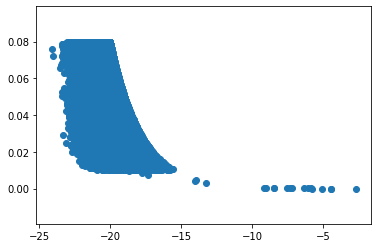

In [8]:
binn=stats.binned_statistic(z, mr, statistic='max', bins=100)
plt.scatter(mr,z);